# 추정과 검정

- 통계적 추론이란 표본의 정보로부터 모집단의 정보를 얻는 것
- 모집단의 특성을 나타내는 상수들을 모수 (Population parameter)
    - 모평균 / 모비율 / 모분산
- 모수를 추정(estimation)하기 위해 표본 통계량을 사용하여 가설검정(Test of hypothesis)
    - 표본평균 / 표본비율 / 표본분산
- 가설 검정
    - 임계값과 검정 통계량을 비교하여 검정 통계량이 채택역에 있으면 귀무가설, 기각역에 있으면 대립가설 채택
    - 유의수준과 유의확률을 비교하여 유의수준보다 유의확률이 크면 귀무가설, 작으면 대립가설을 채택한다.
    - 검정하고자 하는 값이 신뢰구간 내에 있으면 귀무가설, 없으면 대립가설 채택
- 1종 오류
    - 귀무가설이 참인데 대립가설을 채택하는 오류의 확률
    - a(alpha)로 표기하며 유의수준이라고 한다.
    - 표본으로 추정 가능한 정규분포 곡선이 만들어졌을 때, 아무래도 양쪽 꼬리의 범위에 속한다면, 다른 모집단에서 왔을 가능성이 크다.
    - 이 가능성을 토대로, 양 꼬리에 속하면 버리는 것으로 정하며, 이를 전체의 몇 %비율을 버리는 것으로 정하는 것이다.
    - 이 때의 비율을 유의수준이라고 하며, 이 비율이 커지면 귀무가설이 참인데 기각할 확률이 커진다.
- 2종 오류
    - 대립가설이 참인데 귀무가설을 기각하지 않는 오류의 확률
    - b(beta)로 표기하면 1-b를 검정력이라고 한다.
    - 표본을 통해 추정 가능한 정규분포 곡선을 얻었을 때, 아무래도 양쪽 꼬리에 속한다면, 다른 모집단에서 온 표본일 가능성이 크다.
    - 그래서 양쪽 꼬리의 일정 비율에 속하면 다른 집단에서 온 것이라 보고 이 비율을 정해서 유의수준이라고 한다.
    - 그런데 이 유의수준이 너무 작으면 다른 집단에서 왔음에도 귀무가설을 채택할 확률이 커진다. 
    - 이 오류율를 2종 오류, b라고 하며, 1-b는 다른 집단에서 온 것을 다른 집단으로 온 것으로 판정하는 비율이므로 검정력이라고 한다.
- 중심극한의 정리
    - 표본의 개수가 커질수록 표본평균의 확률분포는 정규분포에 가까워진다.
- 큰 수의 법칙
    - 표본의 개수가 커질수록 표본평균은 모평균에 가까워진다.

# 1-표본

## 모평균의 추정과 검정 (z분포, t분포)

$\alpha$ : 모 평균 </br>
$\sigma$ : 모 표준편차 </br>
$\chi$ : 표본 평균 </br>
S : 표본 표준편차 </br>
n : 표본의 크기 </br>

1) 표본의 크기가 30이상이거나 모집단의 분산을 아는 경우
$\sigma$ 를 가지고 표준화점수를 구해 Z분포에서 검정한다.
2) 표본의 크기가 30미만이고 모집단의 분산을 모르는 경우 (1이 아닌 경우)
S를 가지고 표준화점수를 구해 t분포에서 검정한다.

In [1]:
import numpy as np
from scipy.stats import norm

x = 31100       # 표본 평균
n = 36          # 표본 크기
sigma = 4500    # 모 표준편차
conf_a = 0.05   # 신뢰수준

# 모분산을 알 때 모평균의 추정
SE = sigma / np.sqrt(n)
conf_z = norm.ppf(1-conf_a / 2) # 양측일 때 유의수준에서의 표준화점수
ME = conf_z * SE    # Margin of Error. 허용오차

print(conf_z)
print('점 추정량 : {:.3f}'.format(x))
print('구간 추정량 : {:.3f} ~ {:.3f}'.format(x-ME, x+ME))

1.959963984540054
점 추정량 : 31100.000
구간 추정량 : 29630.027 ~ 32569.973


In [ ]:
#오차의 한계에 따른 표본규모
#오차의 한계가 500 이하일 확률이 0.95가 되도록 모집단 평균의 추정치를 원하는 경우, 표본 규모는 얼마가 되어야 하는가?

## 1종 오류와 2종 오류

# 2 표본

## 분산분석의 가정

### 분산분석의 가정
- 정규성
    - 의미 : 각 표본의 반응변수는 정규분포여야 한다.
    - 방법 : Shapiro(소규모), Anderson-Darling(대규모), 콜모로프 스미르노프, Jarque-Bera, QQ plot 등
- 등분산성
    - 의미 : 각 표본의 반응변수의 분산이 동일해야 한다.
    - 방법 : Barlett 검정(정규성 만족시), Levene 검정(정규성 불만족시)
- 독립성
    - 각 관찰값은 독립적이여야 한다.

## 분산분석 (F분포)

### 분산분석 방법
- 정규성(O), 등분산(O), 샘플크기 동일(O)
    - 분석방법 : standard ANOVA
    - 사후검정 : Dunnett, Tukey HSD, snk, Duncan, REGWQ, REGWF
- 정규성(O), 등분산(O), 샘플크기 동일(X)
    - 분석방법 : standard ANOVA
    - 사후검정 : Fisher's LSD, Scheffe, Dunnett, Tukey HSD, Bonferroni, sidak, Hochberg GT2, Gabrial
- 정규성(), 등분산(X)
    - 분석방법 : Welch's ANOVA, Brown-Forsythe ANOVA
    - 사후검정 : GamesHowell, Dunnett T3, Tamhane T2
### 분산분석 종류
- 일원배치 분산분석
    - 종속변수(1), 독립변수(1)
- 이원배치 분산분석
    - 종속변수(1), 독립변수(2)
- 다중배치 분산분석
    - 종속변수(1), 독립변수(3<=)
- 다변량 분산분석
    - 종속변수(2<=)

#### 일원배치 분산분석 (등분산)
- 완전확률화계획법 (Completely randomized design)

In [1]:
# 일원배치 분산분석 (등분산 가정)
import pandas as pd
import matplotlib.pyplot as plt

data = pd.DataFrame({"A0":[76,80,78,79,83,74], 
                    'A1':[82,75,83,78,85,80], 
                    'A2':[79,87,88,86,84,82], 
                    'A3':[81,74,76,78,73,70]})


  stat: 6.953,  p-value: 0.002
 Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower    upper  reject
-----------------------------------------------------
    A0     A1   2.1667  0.713   -3.518  7.8513  False
    A0     A2      6.0 0.0363   0.3153 11.6847   True
    A0     A3     -3.0  0.469  -8.6847  2.6847  False
    A1     A2   3.8333 0.2647  -1.8513   9.518  False
    A1     A3  -5.1667 0.0831 -10.8513   0.518  False
    A2     A3     -9.0 0.0014 -14.6847 -3.3153   True
-----------------------------------------------------


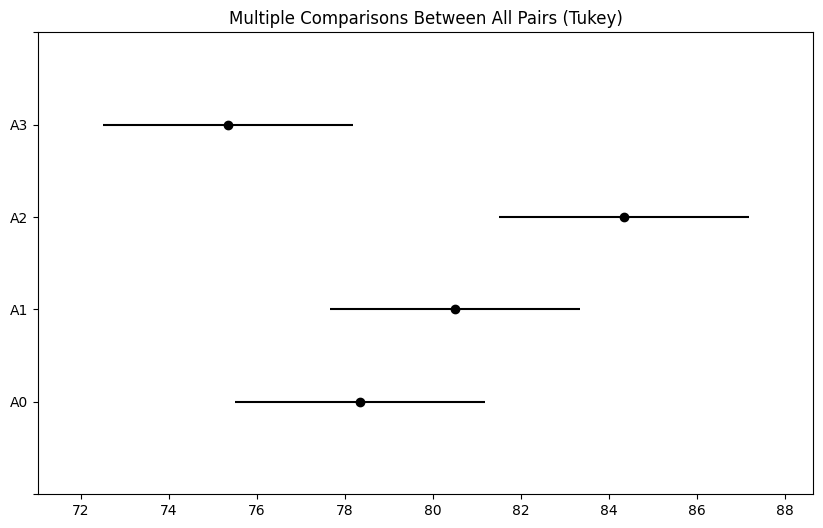

In [2]:
# 분산분석 수행
from statsmodels.stats.oneway import anova_oneway
oa = anova_oneway(data=data.melt()['value'], groups=data.melt()['variable'],use_var='equal')
print('  stat: {:.3f},  p-value: {:.3f}'.format(oa.statistic, oa.pvalue))

# 사후검정 (정규성 O, 등분산 O, 샘플크기 동일) ==> Tukey HSD
from statsmodels.sandbox.stats.multicomp import MultiComparison
from scipy.stats import ttest_ind
org_data = data.melt()

mc = MultiComparison(data=org_data['value'], groups=org_data['variable']).tukeyhsd(alpha=0.05)
print(mc)

mc.plot_simultaneous()
plt.show()

# 사후검정 결과, A0-A2, A2-A3 간의 모평균의 차이가 있는 것으로 확인하였다.
# meandiff는 각 그룹 간 모평균 차의 점추정량이고, lower-upper는 모평균 찯의 신뢰구간을 나타낸다.
# p-adj는 조정된 p-value로서 유의수준 0.05보다 적은 경우 reject True로 판명되어 귀무가설을 기각한다.

#### 이원배치 분산분석 (등분산)

In [13]:
from pandas import DataFrame, crosstab

data = pd.DataFrame({   "A":[1,2,3,1,2,3,1,2,3,1,2,3],
                        "B":[1,1,1,2,2,2,3,3,3,4,4,4],
                        "Y": [4,3,5,5,7,6,7,8,9,8,10,12]})

print('데이터확인 \n', crosstab(data['A'], data['B'], values=data['Y'], aggfunc=list))

from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm

model = ols("Y~C(A)+C(B)", data = data).fit()
atable2 = anova_lm(model)
print('\n\n',atable2)

#A 그룹 간의 차이는 없고, B그룹 간의 차이가 있는 것으로 나타났다.

데이터확인 
 B    1    2    3     4
A                     
1  [4]  [5]  [7]   [8]
2  [3]  [7]  [8]  [10]
3  [5]  [6]  [9]  [12]


            df  sum_sq  mean_sq     F    PR(>F)
C(A)      2.0     8.0      4.0   4.0  0.078717
C(B)      3.0    60.0     20.0  20.0  0.001586
Residual  6.0     6.0      1.0   NaN       NaN
